In [79]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [80]:
trainDF = pd.read_csv('train.csv')
print(trainDF.info())
trainDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [81]:
testDF = pd.read_csv('test.csv')
print(testDF.info())
testDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S
334,1226,3,"Cor, Mr. Ivan",male,27.0,0,0,349229,7.8958,NaN,S
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S


In [82]:
concatDF = pd.concat([trainDF,testDF])
concatDF = concatDF.reset_index(drop=True)
pd.get_dummies(concatDF,columns=['Sex','Embarked']).drop(columns=['PassengerId','Name','Ticket','Cabin']).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.124617,0.124617,-0.269658,0.230491,0.096335
Age,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.063645,0.063645,0.085777,-0.019458,-0.075972
SibSp,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,0.109609,-0.109609,-0.048396,-0.048678,0.075198
Parch,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,0.213125,-0.213125,-0.008635,-0.100943,0.073258
Fare,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.185523,-0.185523,0.286269,-0.130059,-0.172683
Sex_female,0.543351,-0.124617,-0.063645,0.109609,0.213125,0.185523,1.000000,-1.000000,0.066564,0.088651,-0.119504
Sex_male,-0.543351,0.124617,0.063645,-0.109609,-0.213125,-0.185523,-1.000000,1.000000,-0.066564,-0.088651,0.119504
Embarked_C,0.168240,-0.269658,0.085777,-0.048396,-0.008635,0.286269,0.066564,-0.066564,1.000000,-0.164166,-0.775441
Embarked_Q,0.003650,0.230491,-0.019458,-0.048678,-0.100943,-0.130059,0.088651,-0.088651,-0.164166,1.000000,-0.489874


In [83]:
concatDF['Fare']=pd.qcut(concatDF['Fare'],3)
embarked = concatDF[['Pclass','Fare','Embarked','PassengerId']].groupby(['Pclass','Fare','Embarked']).count()
embarked

/var/folders/p1/3vvm71l55lddcz4t_gf8bd1r0000gn/T/ipykernel_57870/1256574800.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  embarked = concatDF[['Pclass','Fare','Embarked','PassengerId']].groupby(['Pclass','Fare','Embarked']).count()


PassengerId
Pclass Fare            Embarked             
1      (-0.001, 8.662] C                   0
                       Q                   0
                       S                   8
       (8.662, 26.0]   C                   2
                       Q                   0
                       S                  12
       (26.0, 512.329] C                 139
                       Q                   3
                       S                 157
2      (-0.001, 8.662] C                   0
                       Q                   0
                       S                   6
       (8.662, 26.0]   C                  17
                       Q                   7
                       S                 187
       (26.0, 512.329] C                  11
                       Q                   0
                       S                  49
3      (-0.001, 8.662] C                  58
                       Q                  91
                       S                 291
       (8.662, 26.0]   C                  43
                       Q                  16
                       S                 144
       (26.0, 512.329] C                   0
                       Q                   6
                       S                  59

In [84]:
train1DF = pd.read_csv('train1.csv')
print(train1DF.info())
train1DF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.525,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.000,NaN,S
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.000,NaN,S


In [85]:
concatDF = pd.concat([train1DF,testDF])
concatDF= concatDF[['PassengerId','Survived','Pclass','Fare','Sex','Embarked']]
concatDF = pd.get_dummies(concatDF,columns=['Pclass','Sex','Embarked'])
print(concatDF.info())
concatDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Fare         1308 non-null   float64
 3   Pclass_1     1309 non-null   bool   
 4   Pclass_2     1309 non-null   bool   
 5   Pclass_3     1309 non-null   bool   
 6   Sex_female   1309 non-null   bool   
 7   Sex_male     1309 non-null   bool   
 8   Embarked_C   1309 non-null   bool   
 9   Embarked_Q   1309 non-null   bool   
 10  Embarked_S   1309 non-null   bool   
dtypes: bool(8), float64(2), int64(1)
memory usage: 51.1 KB
None


,PassengerId,Survived,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
244,1136,NaN,23.4500,False,False,True,False,True,False,False,True
509,510,1.0,56.4958,False,False,True,False,True,False,False,True
79,971,NaN,7.7500,False,False,True,True,False,False,True,False


In [86]:

trainDF = concatDF[:len(trainDF)]
testDF = concatDF[len(trainDF):]
train1DF.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
285,286,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C


In [87]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, DF:pd.DataFrame):
        self.PassengerId= DF['PassengerId'].values
        self.Servived = pd.get_dummies(DF['Survived'].astype(float)).values
        DF = DF.drop(columns=['PassengerId','Survived'])
        self.data = DF.astype(float).values
        pass

    def __len__(self):
        return len(self.PassengerId)

    def __getitem__(self, idx):

        x = torch.FloatTensor(self.data[idx])
        y = torch.FloatTensor(self.Servived[idx])
        return x, y


dataSet = MyDataset(DF=trainDF)
testSet = MyDataset(DF=testDF)
dataSet[0]

(tensor([7.2500, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000]),
 tensor([1., 0.]))

In [88]:

trainSet, valSet = torch.utils.data.random_split(dataSet,(0.8,0.2))

In [89]:
trainLoader= torch.utils.data.DataLoader(trainSet,batch_size=2048,sampler=torch.utils.data.RandomSampler(trainSet))
valLoader= torch.utils.data.DataLoader(valSet,batch_size=2048,sampler=torch.utils.data.RandomSampler(valSet))
testLoader = torch.utils.data.DataLoader(testSet,batch_size=2048)
next(iter(trainLoader))

[tensor([[ 26.5500,   1.0000,   0.0000,  ...,   0.0000,   0.0000,   1.0000],
         [  7.7500,   0.0000,   0.0000,  ...,   0.0000,   1.0000,   0.0000],
         [227.5250,   1.0000,   0.0000,  ...,   1.0000,   0.0000,   0.0000],
         ...,
         [  7.8792,   0.0000,   0.0000,  ...,   0.0000,   1.0000,   0.0000],
         [ 21.0750,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   1.0000],
         [  7.2250,   0.0000,   0.0000,  ...,   1.0000,   0.0000,   0.0000]]),
 tensor([[1., 0.],
         [0., 1.],
         [1., 0.],
         ...,
         [0., 1.],
         [1., 0.],
         [1., 0.]])]

In [90]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(9, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 7),
            torch.nn.ReLU(),
            torch.nn.Linear(7, 6),
            torch.nn.ReLU(),
            torch.nn.Linear(6, 5),
            torch.nn.ReLU(),
            torch.nn.Linear(5, 4),
            torch.nn.ReLU(),
            torch.nn.Linear(4, 3),
            torch.nn.ReLU(),
            torch.nn.Linear(3, 2)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using mps device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=9, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
    (3): ReLU()
    (4): Linear(in_features=7, out_features=6, bias=True)
    (5): ReLU()
    (6): Linear(in_features=6, out_features=5, bias=True)
    (7): ReLU()
    (8): Linear(in_features=5, out_features=4, bias=True)
    (9): ReLU()
    (10): Linear(in_features=4, out_features=3, bias=True)
    (11): ReLU()
    (12): Linear(in_features=3, out_features=2, bias=True)
  )
)


In [91]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters())

cnt: 0 - valLoss: 0.7042537927627563 - trainLoss: 0.7045736908912659
cnt: 0 - valLoss: 0.7042015194892883 - trainLoss: 0.7045247554779053
cnt: 0 - valLoss: 0.7041487097740173 - trainLoss: 0.7044757604598999
cnt: 0 - valLoss: 0.7040960788726807 - trainLoss: 0.7044262886047363
cnt: 0 - valLoss: 0.7040436863899231 - trainLoss: 0.7043768763542175
cnt: 0 - valLoss: 0.7039912939071655 - trainLoss: 0.7043277621269226
cnt: 0 - valLoss: 0.7039399147033691 - trainLoss: 0.7042786478996277
cnt: 0 - valLoss: 0.7038882970809937 - trainLoss: 0.7042296528816223
cnt: 0 - valLoss: 0.7038368582725525 - trainLoss: 0.7041808366775513
cnt: 0 - valLoss: 0.7037851810455322 - trainLoss: 0.7041320204734802
cnt: 0 - valLoss: 0.7037336230278015 - trainLoss: 0.7040831446647644
cnt: 0 - valLoss: 0.7036821842193604 - trainLoss: 0.7040342688560486
cnt: 0 - valLoss: 0.7036306262016296 - trainLoss: 0.7039855718612671
cnt: 0 - valLoss: 0.7035790085792542 - trainLoss: 0.703936755657196
cnt: 0 - valLoss: 0.703527152538299

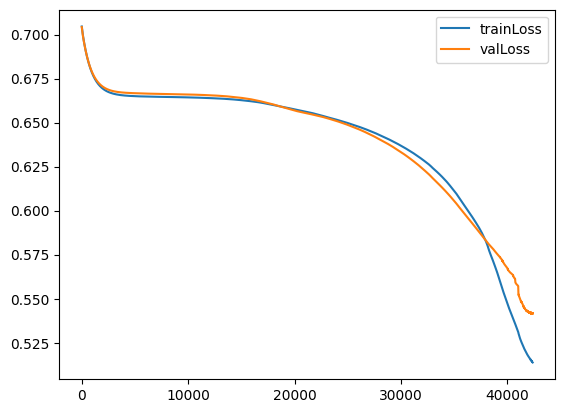

In [92]:
def trainAI(dataloader, model, loss_fn, optimizer):
    model.train()
    trainLoss=0
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        trainLoss +=loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return trainLoss

def valAI(dataloader, model, loss_fn):
    model.eval()
    valLoss =0
    with torch.no_grad():
        for X ,y  in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            # for i in loss:
            valLoss+= loss.item()
    return valLoss

trainLoss=[]
valLoss=[]
bestModel = model
bestLoss = float('inf')
cnt=0

while(cnt<100):
    trainLoss.append(trainAI(trainLoader, model, loss_fn, optimizer))
    valLoss.append(valAI(valLoader, model, loss_fn))

    print(f'cnt: {cnt} - valLoss: {valLoss[-1]} - trainLoss: {trainLoss[-1]}')
    if bestLoss<valLoss[-1]:
        cnt+=1
    else:
        cnt = 0
        bestLoss = valLoss[-1]
        bestModel = model

plt.plot(trainLoss,label='trainLoss')
plt.plot(valLoss,label='valLoss')
plt.legend()

In [93]:
def testAI(dataloader, model):
    model.eval()
    result = []
    y=892
    with torch.no_grad():
        for X ,_  in dataloader:
            X  = X.to(device)
            pred = model(X)
            for i in pred:
                result.append([y,torch.argmax(i).item()])
                y+=1
    return result

result = testAI(testLoader, bestModel)
result = pd.DataFrame(result)
result = result.astype(int)
result.columns=['passengerId','Survived']
result

,passengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [94]:
result.to_csv('result.csv',index=False)